># <font color='orange'>MATPLOTLIB<font>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Making Plots Actually Look Nice

In [2]:
plt.style.use(['science','notebook','grid'])

# Quick Plotting

## Line Plots
- Simple plotting commands to look at data quickly

In [3]:
x=np.linspace(0,15,20)
y=np.sin(x)+ 0.1*np.random.randn(len(x))

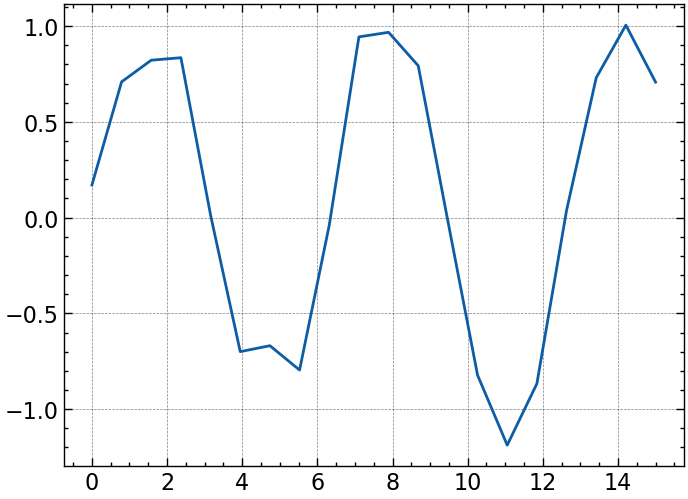

In [4]:
plt.plot(x,y)

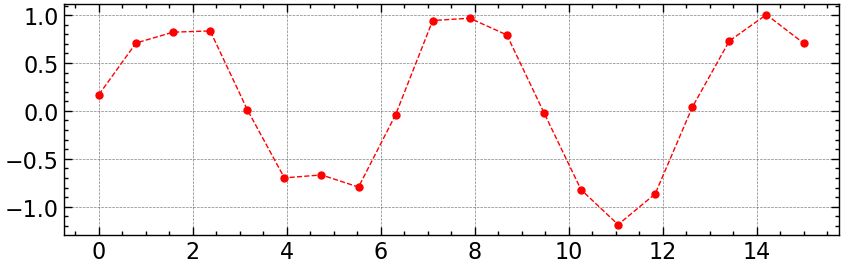

In [5]:
plt.figure(figsize=(10,3))
plt.plot(x,y,'o--r',lw=1,ms=5)

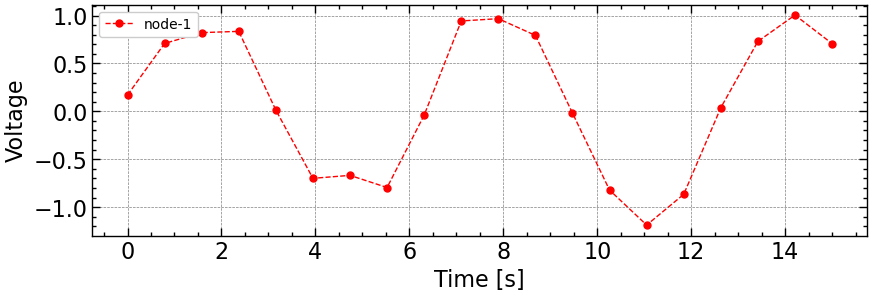

In [6]:
plt.figure(figsize=(10,3))
plt.plot(x,y,'o--r',lw=1,ms=5,label='node-1')
plt.xlabel('Time [s]')
plt.ylabel('Voltage')
plt.legend(loc='upper left',fontsize=10)

- Easy to have multiple lines on same plot

In [7]:
x_2=np.linspace(0,15,100)
y_2=np.sin(x_2)

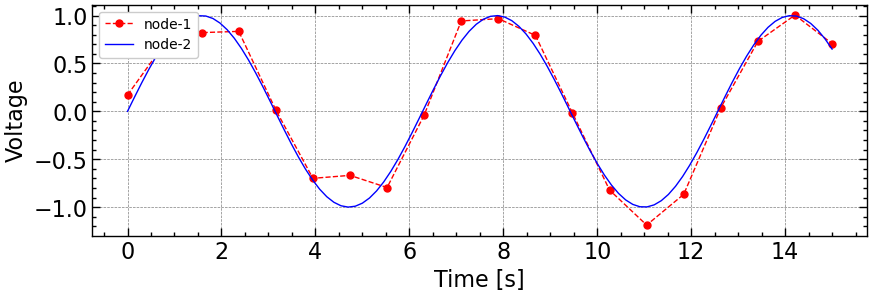

In [8]:
plt.figure(figsize=(10,3))
plt.plot(x,y,'o--r',lw=1,ms=5,label='node-1')
plt.plot(x_2,y_2,'-b',lw=1,ms=5,label='node-2')
plt.xlabel('Time [s]')
plt.ylabel('Voltage')
plt.legend(loc='upper left',fontsize=10)

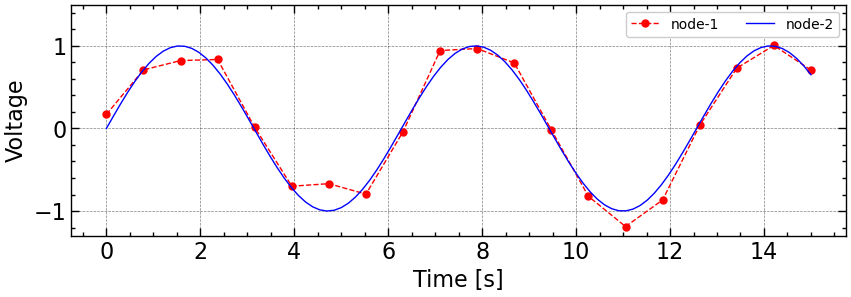

In [9]:
plt.figure(figsize=(10,3))
plt.plot(x,y,'o--r',lw=1,ms=5,label='node-1')
plt.plot(x_2,y_2,'-b',lw=1,ms=5,label='node-2')
plt.xlabel('Time [s]')
plt.ylabel('Voltage')
plt.ylim(top=1.5)
plt.legend(loc='upper right',fontsize=10,ncol=2)

## Histogram

In [10]:
res=np.random.randn(1000)*0.2+0.4

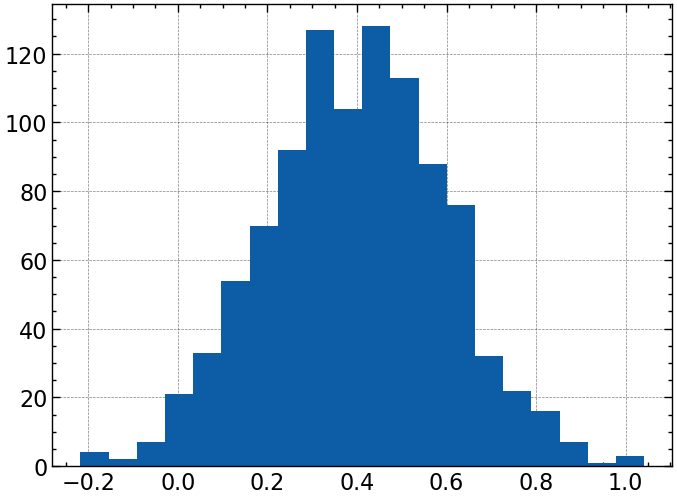

In [11]:
a=plt.hist(res,bins=20)

In [12]:
a

(array([  4.,   2.,   7.,  21.,  33.,  54.,  70.,  92., 127., 104., 128.,
        113.,  88.,  76.,  32.,  22.,  16.,   7.,   1.,   3.]),
 array([-0.21755188, -0.15461976, -0.09168764, -0.02875552,  0.0341766 ,
         0.09710872,  0.16004084,  0.22297296,  0.28590508,  0.3488372 ,
         0.41176932,  0.47470144,  0.53763356,  0.60056568,  0.6634978 ,
         0.72642992,  0.78936204,  0.85229416,  0.91522628,  0.9781584 ,
         1.04109052]),
 <BarContainer object of 20 artists>)

- **Quick Histogram**

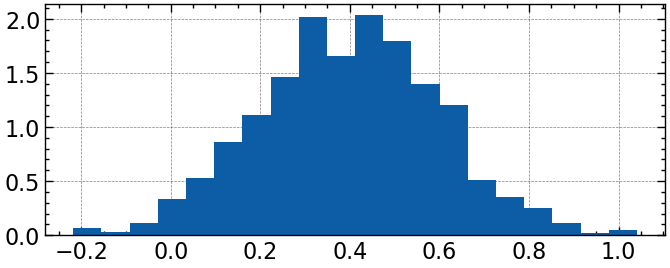

In [13]:
plt.figure(figsize=(8,3))
plt.hist(res,bins=20,density=True) #Area under curve=1
# plt.grid()
plt.show()

- Different style of bins (useful for plotting multiple histogram)

In [14]:
res2=np.random.randn(1000)*0.2+0.4

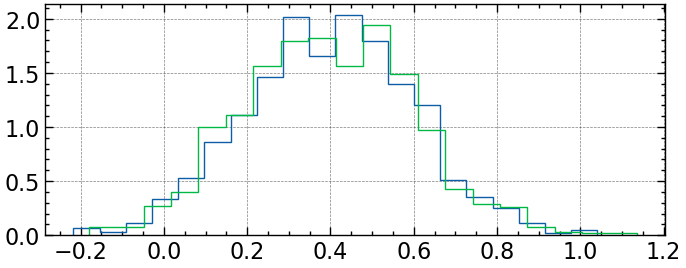

In [15]:
plt.figure(figsize=(8,3))
plt.hist(res,bins=20,density=True,histtype='step') #Area under curve=1
plt.hist(res2,bins=20,density=True,histtype='step') #Area under curve=1
# plt.grid()
plt.show()

## A More Advanced API
For more complicated plots, such as
- Multiple subplots on 1 figure
- Conveniently adding text to plots
- Creating animations

One needs to use a slightly more advanced API

### Single Axes in one Figure

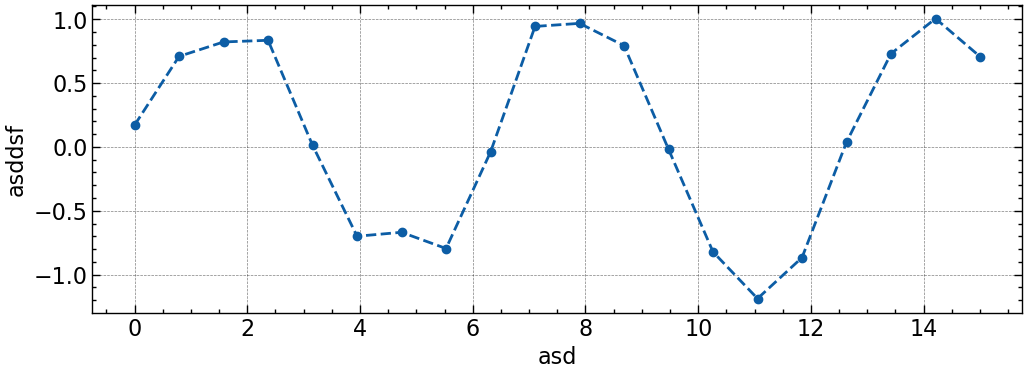

In [16]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(x,y,'o--')
# ax.grid()
ax.set_xlabel('asd')
ax.set_ylabel('asddsf')
plt.show()

### Multiple axis in 1 Figure

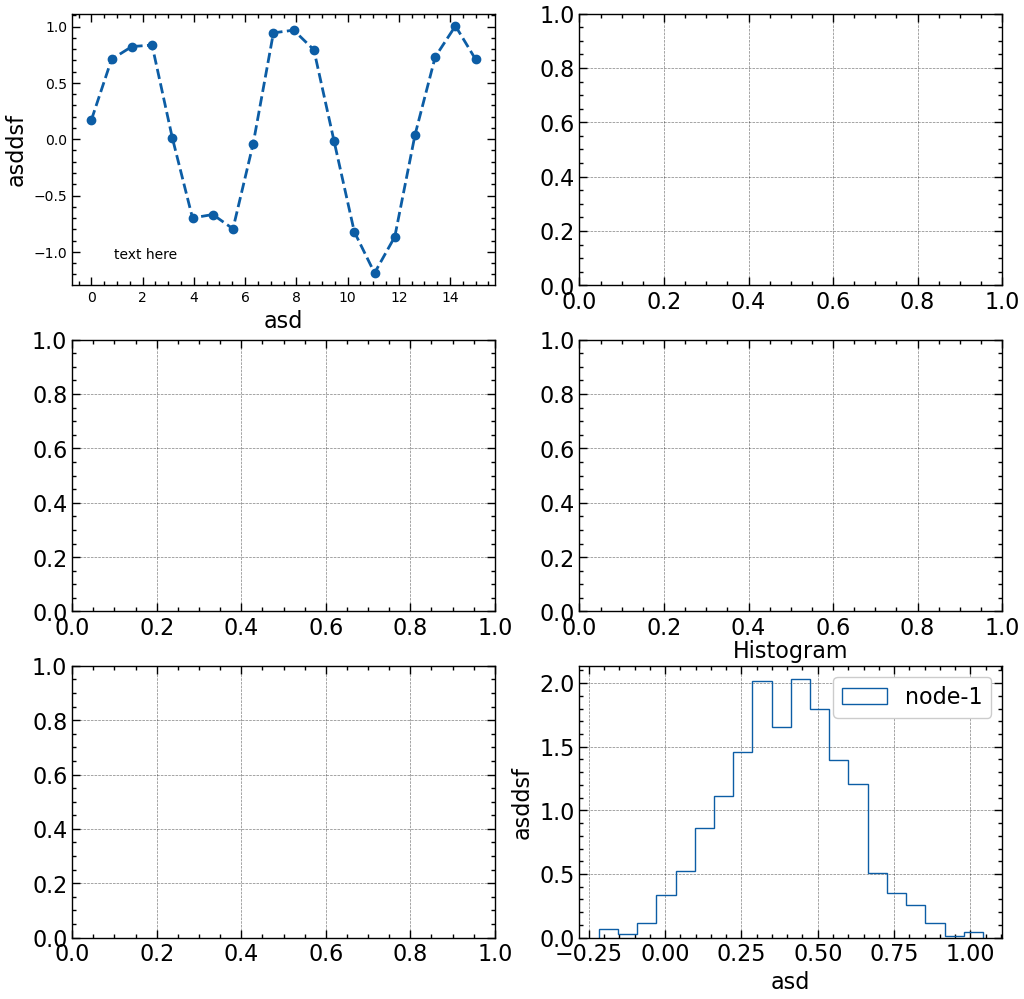

In [17]:
fig,axes=plt.subplots(3,2,figsize=(12,12))
ax=axes[0][0]
ax.plot(x,y,'o--')
ax.grid()
ax.set_xlabel('asd')
ax.set_ylabel('asddsf')
ax.text(0.1,0.1,'text here',transform=ax.transAxes)# I prefer without transform
ax.tick_params(axis='both',labelsize=10)
ax=axes[2][1]
plt.hist(res,bins=20,density=True,histtype='step',label='node-1')
# ax.grid()
ax.set_xlabel('asd')
ax.set_ylabel('asddsf')
ax.set_title('Histogram')
ax.legend()
plt.show()

In [18]:
axes

array([[<AxesSubplot:xlabel='asd', ylabel='asddsf'>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>,
        <AxesSubplot:title={'center':'Histogram'}, xlabel='asd', ylabel='asddsf'>]],
      dtype=object)

## Example

- Creating the following plot

In [19]:
res_a1=0.2*np.random.randn(1000)+0.4
res_b1=0.25*np.random.randn(1000)+0.4
res_a2=0.21*np.random.randn(1000)+0.3
res_b2=0.22*np.random.randn(1000)+0.3

In [20]:
text_str_1='\n'.join((
    r'$\sigma_a=%.4f$' %(np.std(res_a1)),
    r'$\sigma_b=%.4f$' %(np.std(res_b1))))
                     
text_str_2='\n'.join((
    r'$\sigma_a=%.4f$' %(np.std(res_a2)),
    r'$\sigma_b=%.4f$' %(np.std(res_b2))))

In [21]:
text_str_1

'$\\sigma_a=0.1996$\n$\\sigma_b=0.2545$'

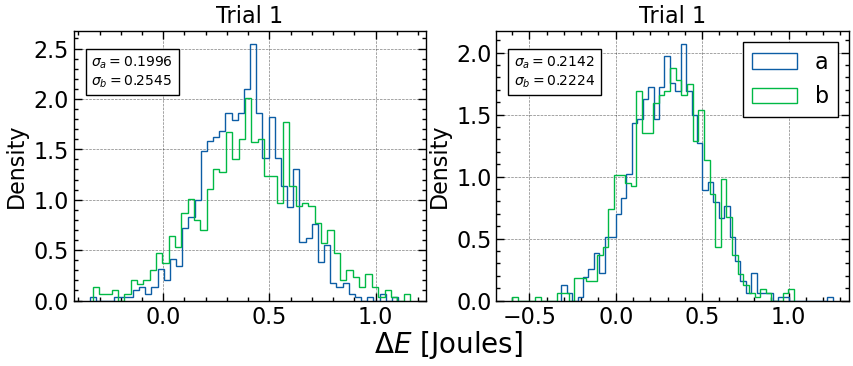

In [22]:
fig,axes=plt.subplots(1,2,figsize=(10,3.5))
ax=axes[0]
ax.hist(res_a1,bins=50,histtype='step',density=True,label='a')
ax.hist(res_b1,bins=50,histtype='step',density=True,label='b')
ax.text(0.05,0.8,text_str_1,transform=ax.transAxes,bbox=dict(facecolor='white',edgecolor='black'))
ax.set_ylabel('Density')
ax.set_title('Trial 1')
ax=axes[1]
ax.hist(res_a2,bins=50,histtype='step',density=True,label='a')
ax.hist(res_b2,bins=50,histtype='step',density=True,label='b')
ax.legend(fancybox=False,edgecolor='black')
ax.text(0.05,0.8,text_str_2,transform=ax.transAxes,bbox=dict(facecolor='white',edgecolor='black'))
ax.set_ylabel('Density')
ax.set_title('Trial 1')
fig.text(0.5,-0.04,'$\Delta E$ [Joules]',ha='center',fontsize=20)
plt.savefig('plot.png',dpi=200)
plt.show()

## Bivariate Plots
Generating some data

In [23]:
_=np.linspace(-1,1,100)
x,y=np.meshgrid(_,_)
z=x**2-y**2

## Filled-in contour plots

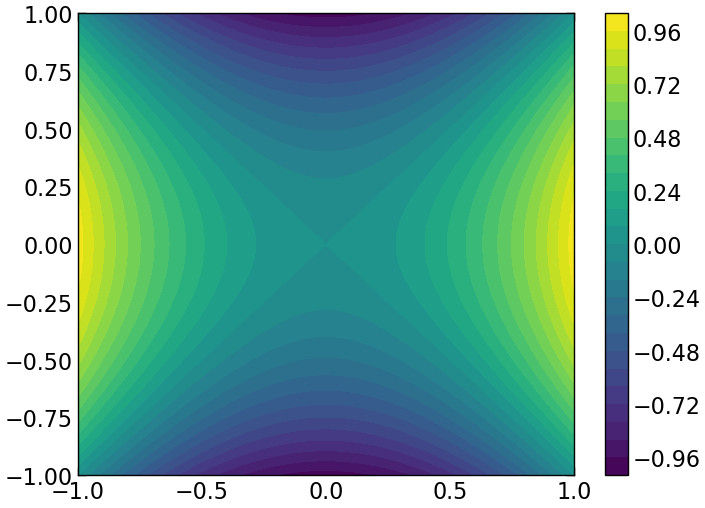

In [24]:
plt.contourf(x,y,z,levels=30)
plt.colorbar()

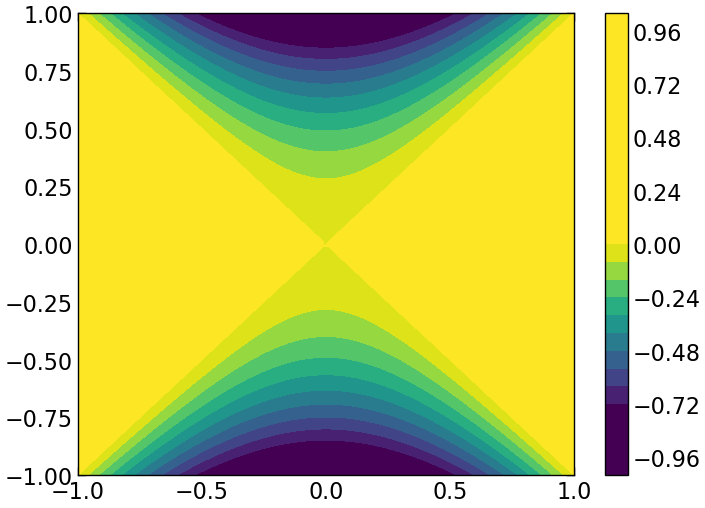

In [25]:
plt.contourf(x,y,z,levels=30,vmin=-0.75,vmax=0)
plt.colorbar()

## Contour Plots

<a list of 14 text.Text objects>

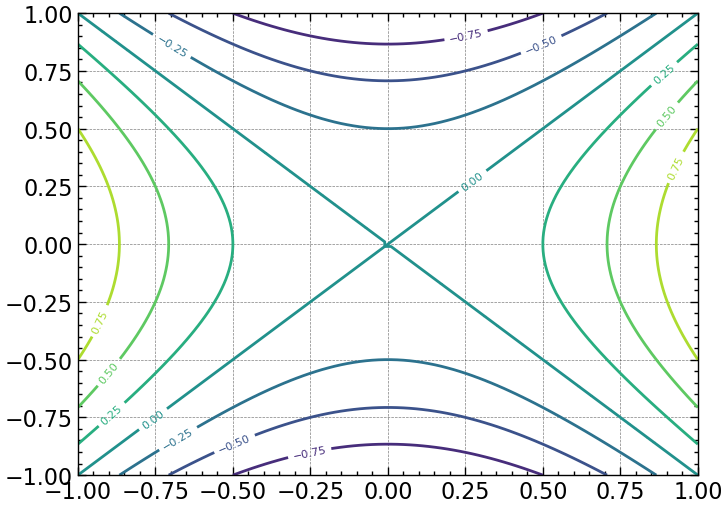

In [26]:
cs=plt.contour(x,y,z)
plt.clabel(cs,fontsize=8)

## 3D Surface Plot
- 3D surface plot (Generally not preffered). However, they tend to work well in animations.

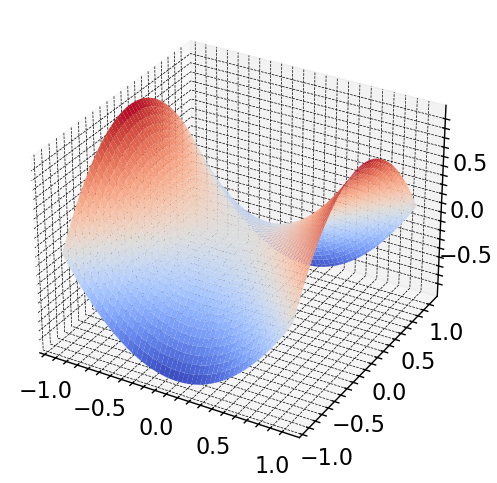

In [27]:
fig,axes=plt.subplots(subplot_kw={'projection':'3d'})
axes.plot_surface(x,y,z,cmap='coolwarm')

## Stream Plots

- For plotting vector fields.

In [28]:
w=3
_=np.linspace(-3,3,100)
X,Y=np.meshgrid(_,_)
U=-1-X**2+Y
V=1+X-Y**2
speed=np.sqrt(U**2+V**2)

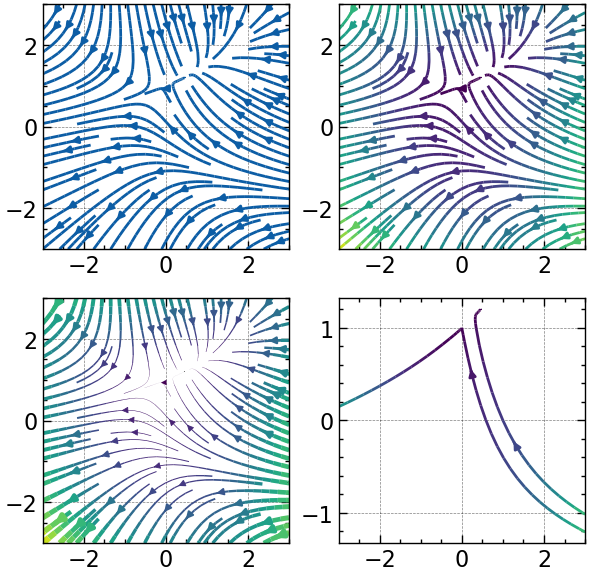

In [29]:
fig,axes=plt.subplots(2,2,figsize=(7,7))
ax=axes[0][0]
ax.streamplot(X,Y,U,V)
ax=axes[0][1]
ax.streamplot(X,Y,U,V,color=speed)
ax=axes[1][0]
lw=5*speed/speed.max()
ax.streamplot(X,Y,U,V,color=speed,linewidth=lw)
ax=axes[1][1]
seedpoints=np.array([[0,1],[1,0]])
ax.streamplot(X,Y,U,V,color=speed,start_points=seedpoints)

## Image Reading

In [30]:
im=plt.imread(r'C:\Users\Atul\Desktop\Matplotlib_scrollbar.png')

Plot Image

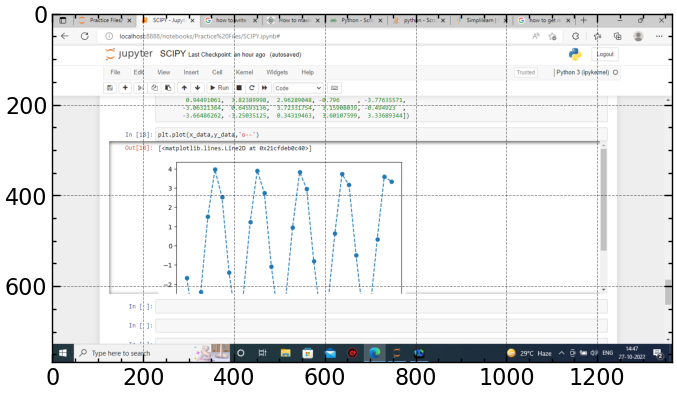

In [31]:
plt.imshow(im)

## Animations

Animations require relating the time of your problem to the fram of the animation, then specifying the frames per second
- Below is a sin wave moving at 3 m/s. Translate this into an animation.

In [32]:
def f(x,t):
    return np.sin(x-3*t)

x=np.linspace(0,10*np.pi,1000)

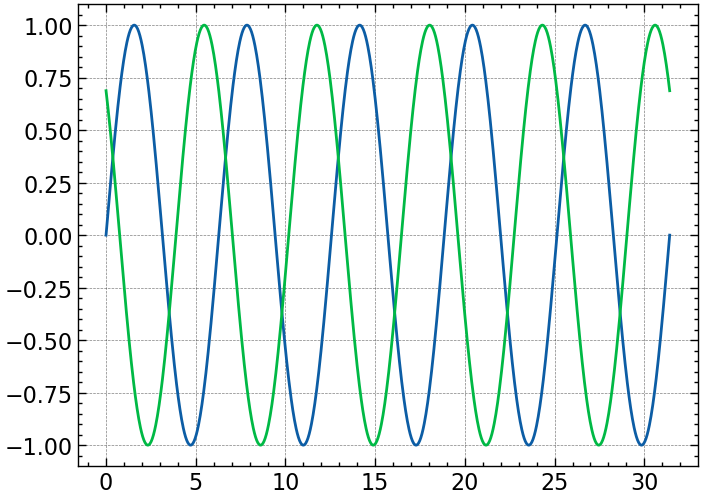

In [33]:
plt.plot(x, f(x,0))
plt.plot(x, f(x,1.3))

- Create animation

In [34]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

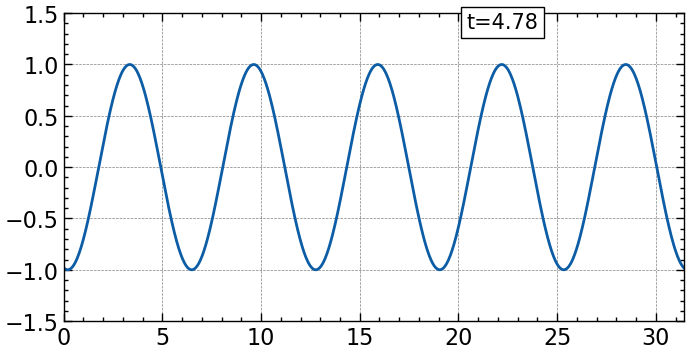

In [35]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
ln1,=plt.plot([],[])
time_text=ax.text(0.65,0.95,'empty',fontsize=15,transform=ax.transAxes,bbox=dict(facecolor='white',edgecolor='black'))
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5,1.5)

def animate(i):
    ln1.set_data(x,f(x,i/50))
    time_text.set_text('t={:.2f}'.format(i/50))
    
ani=animation.FuncAnimation(fig,animate,frames=240,interval=50)
ani.save('ani.gif',writer='pillow',fps=50,dpi=100)

In [36]:
_=np.linspace(-1,1,100)
x,y=np.meshgrid(_,_)
z=x**2-y**2

In [37]:
plt.style.use(['default'])

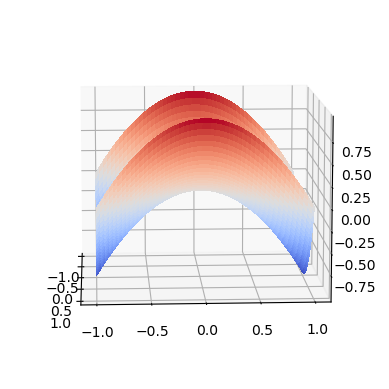

In [38]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(x,y,z,cmap='coolwarm',linewidth=0,antialiased=False)
ax.view_init(elev=10,azim=0)

def animate(i):
    ax.view_init(elev=10,azim=3*i)
    
ani=animation.FuncAnimation(fig,animate,frames=240,interval=50)
ani.save('math_function.gif',writer='pillow',fps=30,dpi=100)
